## Testing the Conduction Losses

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rmsValue(current):
    '''
    Calculate the RMS value.
    '''
    
    import numpy as np
    
    return np.sqrt(np.sum(np.power(current, 2)) / current.size)


def tableConductionLosses3(switch_s1, switch_s2, current, 
                           Vo_IGBT1, Vo_IGBT2, 
                           Vo_Diode1, Vo_Diode2, Vo_Diode,
                           Ro_IGBT1, Ro_IGBT2,
                           Ro_Diode1, Ro_Diode2, Ro_Diode5):
    '''
        Table with Conduction Losses for TDD 3-Levels.
    '''
    
    switch_s1 = np.array(switch_s1)
    switch_s2 = np.array(switch_s2)
    current = np.array(current)
    
    pos_current = np.zeros(current.size)
    neg_current = np.zeros(current.size)
    
    pos_current[current >= 0] = current[current >= 0]
    neg_current[current < 0]  = current[current < 0]
    
    S1_S2 = np.logical_and(switch_s1, switch_s2)
    S2_S3 = np.logical_and(np.logical_not(switch_s1), switch_s2)
    S3_S4 = np.logical_and(np.logical_not(switch_s1), np.logical_not(switch_s2))
    
    s1_times_current = switch_s1 * current
    s2_times_current = switch_s2 * current
        
    
    current_S1_S2 = np.zeros(current.size)
    current_D1_D2 = np.zeros(current.size)
    
    current_S2_D5 = np.zeros(current.size)
    current_S3_D6 = np.zeros(current.size)
    
    current_D3_D4 = np.zeros(current.size)
    current_S3_S4 = np.zeros(current.size)

    ###
    
    current_S1_S2 = pos_current * S1_S2
    current_D1_D2 = neg_current * S1_S2
    
    current_S2_D5 = pos_current * S2_S3
    current_S3_D6 = neg_current * S2_S3
    
    current_D3_D4 = pos_current * S3_S4
    current_S3_S4 = neg_current * S3_S4
    
    s1_cd = Vo_IGBT1  * np.mean(current_S1_S2) + Ro_IGBT1  * np.power(rmsValue(current_S1_S2), 2) 
    s2_cd = Vo_IGBT2  * np.mean(current_S1_S2) + Ro_IGBT2  * np.power(rmsValue(current_S1_S2), 2) + \
            Vo_IGBT2  * np.mean(current_S2_D5) + Ro_IGBT2  * np.power(rmsValue(current_S2_D5), 2)
    
    s3_cd = Vo_IGBT2  * np.mean(current_S3_D6) + Ro_IGBT2  * np.power(rmsValue(current_S3_D6), 2) + \
            Vo_IGBT2  * np.mean(current_S3_S4) + Ro_IGBT2  * np.power(rmsValue(current_S3_S4), 2)
    s4_cd = Vo_IGBT1  * np.mean(current_S3_S4) + Ro_IGBT1  * np.power(rmsValue(current_S3_S4), 2)
    
    d1_cd = Vo_Diode1 * np.mean(current_D1_D2) + Ro_Diode1 * np.power(rmsValue(current_D1_D2), 2)
    d2_cd = Vo_Diode2 * np.mean(current_D1_D2) + Ro_Diode2 * np.power(rmsValue(current_D1_D2), 2)
    
    d3_cd = Vo_Diode2 * np.mean(current_D3_D4) + Ro_Diode2 * np.power(rmsValue(current_D3_D4), 2)
    d4_cd = Vo_Diode1 * np.mean(current_D3_D4) + Ro_Diode1 * np.power(rmsValue(current_D3_D4), 2)

    d5_cd = Vo_Diode5 * np.mean(current_S2_D5) + Ro_Diode5 * np.power(rmsValue(current_S2_D5), 2)
    d6_cd = Vo_Diode5 * np.mean(current_S3_D6) + Ro_Diode5 * np.power(rmsValue(current_S3_D6), 2)
    
    P_cd = {'S1': s1_cd,
            'S2': s2_cd,
            'S3': s3_cd,
            'S4': s4_cd,
            'D1': d1_cd,
            'D2': d2_cd,
            'D3': d3_cd,
            'D4': d4_cd,
            'D5': d5_cd,
            'D6': d6_cd}
    
    return P_cd, ((switch_s1, switch_s2), 
                  (current_S1_S2, current_D1_D2, 
                   current_S2_D5, current_S3_D6, 
                   current_D3_D4, current_S3_S4),
                  (rmsValue(current_S1_S2), rmsValue(current_D1_D2), 
                   rmsValue(current_S2_D5), rmsValue(current_S3_D6),
                   rmsValue(current_D3_D4), rmsValue(current_S3_S4)))

Trocas de Estado:
 S2 !S1  ->  S1  S2:   2
 S1  S2  ->  S2 !S1:   3
 S2 !S1  -> !S1 !S2:   3
!S1 !S2  ->  S2 !S1:   2


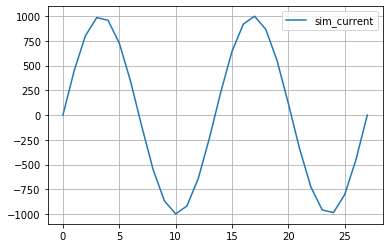

In [3]:
y = np.array(list('AABBBBCCBBBAABBAABBBCCCBBBCC'))

index1 = y == 'A'
index2 = y == 'B'
index3 = y == 'C'

s1 = np.zeros(len(y))
s2 = np.zeros(len(y))
s3 = np.zeros(len(y))
s4 = np.zeros(len(y))

s1[index1] = 1
s2[index1] = 1

s2[index2] = 1
s3[index2] = 1

s3[index3] = 1
s4[index3] = 1

print('Trocas de Estado:')

print(' S2 !S1  ->  S1  S2: %3d'   % 2)
print(' S1  S2  ->  S2 !S1: %3d'  % 3)
print(' S2 !S1  -> !S1 !S2: %3d' % 3)
print('!S1 !S2  ->  S2 !S1: %3d'  % 2)

size = y.size

t = np.linspace(0, 2/60, size)
sim_current = 1000*np.sin(2*np.pi*60*t)

plt.plot(sim_current, label='sim_current')
plt.grid(True)
plt.legend()
plt.show()

### 1. Generating the signals for test

In [4]:
Vdc = 800

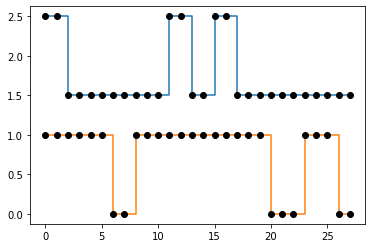

In [5]:
t = np.arange(0, s1.size, 1)

plt.step(t, s1+1.5, where='post')
plt.plot(s1+1.5, 'ko')
plt.step(t, s2, where='post')
plt.plot(s2, 'ko')
plt.show()

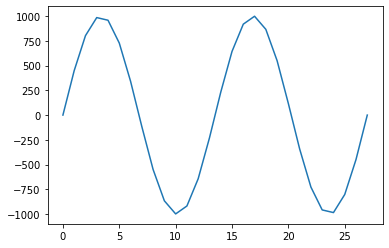

In [6]:
plt.plot(sim_current)

In [7]:
# Parâmetros de um manual da Semikron (SKiM301MLI12E4)

Vcc = 600

Vo_IGBT1 = 2.05 # [V]
Ro_IGBT1 = 3.8*1e-3 # [ohm]

Vo_IGBT2 = 2.05 # [V]
Ro_IGBT2 = 3.8*1e-3 # [ohm]

Vo_Diode1 = 2.55 #[V] 
Ro_Diode1 = 3.4*1e-3 # [ohm]

Vo_Diode2 = 2.55 #[V] 
Ro_Diode2 = 3.4*1e-3 # [ohm]

Vo_Diode5 = 2.49 #[V] 
Ro_Diode5 = 3.2 *1e-3 # [ohm]

In [8]:
P_cd, tmp = tableConductionLosses3(s1, s2, sim_current, 
                                    Vo_IGBT1, Vo_IGBT2, 
                                    Vo_Diode1, Vo_Diode2, Vo_Diode2,
                                    Ro_IGBT1, Ro_IGBT2,
                                    Ro_Diode1, Ro_Diode2, Ro_Diode5)
switchs, currents, rms_currents = tmp

switch_s1, switch_s2 = switchs

current_S1_S2, current_D1_D2, \
current_S2_D5, current_S3_D6, \
current_D3_D4, current_S3_S4 = currents

rms_current_S1_S2, rms_current_D1_D2, \
rms_current_S2_D5, rms_current_S3_D6, \
rms_current_D3_D4, rms_current_S3_S4 = rms_currents

(-1100, 1100)

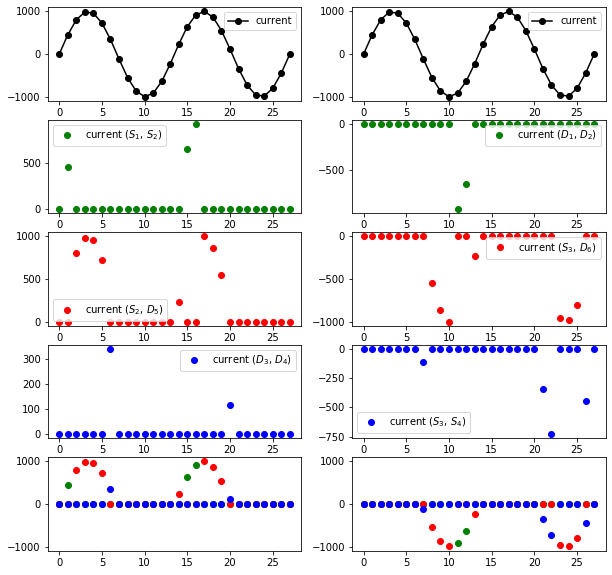

In [9]:
fig, ax = plt.subplots(5, 2, figsize=(10, 10))

plots = [sim_current, current_S1_S2, current_S2_D5, current_D3_D4, 
         sim_current, current_D1_D2, current_S3_D6, current_S3_S4]
coors = [(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3)]
labels = ['current', 'current ($S_1$, $S_2$)', 'current ($S_2$, $D_5$)', 'current ($D_3$, $D_4$)', 
          'current', 'current ($D_1$, $D_2$)', 'current ($S_3$, $D_6$)', 'current ($S_3$, $S_4$)']
colors = ['ko-', 'go', 'ro', 'bo', 'ko-', 'go', 'ro', 'bo']
for coord, plot, label, color in zip(coors, plots, labels, colors):
    ax[coord[1]][coord[0]].plot(plot, color, label=label)
    ax[coord[1]][coord[0]].legend()

ax[4][0].plot(current_S1_S2, 'go')
ax[4][0].plot(current_S2_D5, 'ro')
ax[4][0].plot(current_D3_D4, 'bo')
ax[4][0].set_ylim(-1100, 1100)
ax[4][1].plot(current_D1_D2, 'go')
ax[4][1].plot(current_S3_D6, 'ro')
ax[4][1].plot(current_S3_S4, 'bo')
ax[4][1].set_ylim(-1100, 1100)

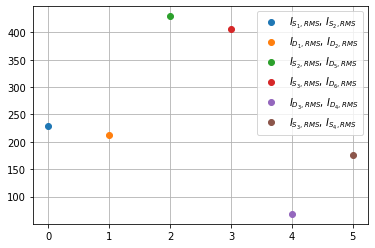

In [10]:
rms_current_S1_S2, rms_current_D1_D2, \
rms_current_S2_D5, rms_current_S3_D6, \
rms_current_D3_D4, rms_current_S3_S4

plt.plot([0], rms_current_S1_S2, 'o', label='$I_{S_1, RMS}$, $I_{S_2, RMS}$')
plt.plot([1], rms_current_D1_D2, 'o', label='$I_{D_1, RMS}$, $I_{D_2, RMS}$')
plt.plot([2], rms_current_S2_D5, 'o', label='$I_{S_2, RMS}$, $I_{D_5, RMS}$')
plt.plot([3], rms_current_S3_D6, 'o', label='$I_{S_3, RMS}$, $I_{D_6, RMS}$')
plt.plot([4], rms_current_D3_D4, 'o', label='$I_{D_3, RMS}$, $I_{D_4, RMS}$')
plt.plot([5], rms_current_S3_S4, 'o', label='$I_{S_3, RMS}$, $I_{S_4, RMS}$')
plt.legend()
plt.grid()
plt.show()

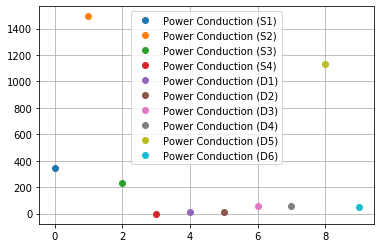

In [11]:
plt.plot([0], P_cd['S1'], 'o', label='Power Conduction (S1)')
plt.plot([1], P_cd['S2'], 'o', label='Power Conduction (S2)')
plt.plot([2], P_cd['S3'], 'o', label='Power Conduction (S3)')
plt.plot([3], P_cd['S4'], 'o', label='Power Conduction (S4)')
plt.plot([4], P_cd['D1'], 'o', label='Power Conduction (D1)')
plt.plot([5], P_cd['D2'], 'o', label='Power Conduction (D2)')
plt.plot([6], P_cd['D3'], 'o', label='Power Conduction (D3)')
plt.plot([7], P_cd['D4'], 'o', label='Power Conduction (D4)')
plt.plot([8], P_cd['D5'], 'o', label='Power Conduction (D5)')
plt.plot([9], P_cd['D6'], 'o', label='Power Conduction (D6)')
plt.grid()
plt.legend()
plt.show()